In [6]:
""" # ---------------- gif:


# ---- teste 1{
#frames = int(final_k / thr_bar.delta_t)
#gif, ax = plt.subplots(projection = '3d')
#gif.suptitle('Superficie')
# ----------- }


#fig = plt.figure()

#ax = fig.add_subplot(projection = '3d')
#ax.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)

#ax.set_zlabel('$T$ $[^{\circ}C]$', fontsize = fs)

#ax.set_ylabel('largura $[m]$',     fontsize = fs)
#ax.set_xlabel('comprimento $[m]$', fontsize = fs)
#ax.set_aspect('equal')
#ax.invert_yaxis()

#curve = ax.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)
#curve.set_animated(True)
print(type(curve))

def update(final_k):
    final_k += 1  #como a função não está definida para t = 0
    print("para um valor de final_k =", final_k)
    for k in range(1, final_k + 1):
        for i in range(1, num_x):
            for j in range(1, num_y):
                # resolve para x:
                new_temp[j][i] += 0.2 * temp[j][i + 1]
                new_temp[j][i] -= 0.4 * temp[j][i]
                new_temp[j][i] += 0.2 * temp[j][i - 1]
                # resolve para y:
                new_temp[j][i] += 0.2 * temp[j + 1][i]
                new_temp[j][i] -= 0.4 * temp[j][i]
                new_temp[j][i] += 0.2 * temp[j - 1][i]
            temp = np.copy(new_temp)
    curve.set_data(x_coords, y_coords, temp)

#anim = FuncAnimation(gif, update, frames = 50, interval = 100)
#anim.save('gif-superficie.gif') """

' # ---------------- gif:\n\n\n# ---- teste 1{\n#frames = int(final_k / thr_bar.delta_t)\n#gif, ax = plt.subplots(projection = \'3d\')\n#gif.suptitle(\'Superficie\')\n# ----------- }\n\n\n#fig = plt.figure()\n\n#ax = fig.add_subplot(projection = \'3d\')\n#ax.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)\n\n#ax.set_zlabel(\'$T$ $[^{\\circ}C]$\', fontsize = fs)\n\n#ax.set_ylabel(\'largura $[m]$\',     fontsize = fs)\n#ax.set_xlabel(\'comprimento $[m]$\', fontsize = fs)\n#ax.set_aspect(\'equal\')\n#ax.invert_yaxis()\n\n#curve = ax.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)\n#curve.set_animated(True)\nprint(type(curve))\n\ndef update(final_k):\n    final_k += 1  #como a função não está definida para t = 0\n    print("para um valor de final_k =", final_k)\n    for k in range(1, final_k + 1):\n        for i in range(1, num_x):\n            for j in range(1, num_y):\n                # resolve para x:\n                new_temp[j][i] += 0.2 * temp[j][i + 1]\n           

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#from matplotlib.animation import PillowWriter
from abc import ABC, abstractmethod

class AbstractPlate(ABC):
    
    def __init__(self, l = 1, N = 100):
        
        # constantes:
        self.length    = l     # comprimento da barra [m]
        self.divisions = N     # número de divisões do domínio

        # vetor usado para a plotagem:
        self.x_coords = np.linspace(0.0, self.length, N + 1)
        self.temps    = np.zeros(N + 1)

        self.delta_x = self.length / N
        self.delta_t = pow(self.delta_x, 2) * 0.2
        self.cte     = self.delta_t / pow(self.delta_x, 2)

    @abstractmethod
    def set_initial_cond(self) -> None:
        pass

    # efetua a mudança de temp.:
    def change_temp(self, final_dt):
        prev = self.temps
        for k in range(1, final_dt + 1):
            for i in range(1, self.divisions):
                self.temps[i] += self.cte * prev[i + 1]
                self.temps[i] += self.cte * prev[i - 1]
                self.temps[i] -= self.cte * prev[i] * 2
            prev = np.copy(self.temps)
        
        self.current_time = k * self.delta_t

para a barra 1:
delta x:  0.01 
delta t:  2e-05 
cte    :  0.2 
 --------------- 
para a barra 2:
delta x:  0.01 
delta t:  2e-05 
cte    :  0.2 
 --------------- 
para a barra 3:
delta x:  0.02 
delta t:  8e-05 
cte    :  0.2 
 --------------- 


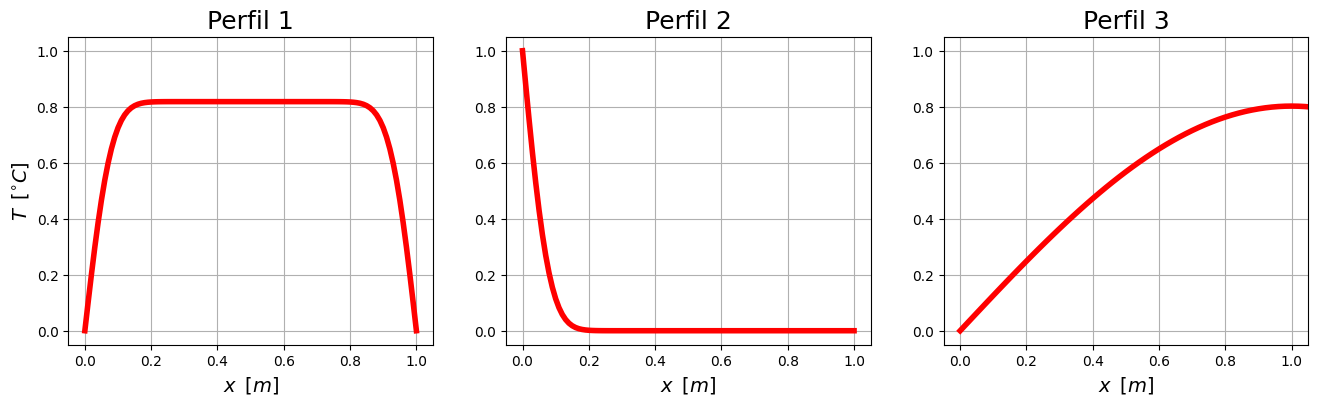

In [42]:
# todas as soluções em um única figura:

K = 100

# ------------------------------------------------------------------------------------------------------------------------------------ 1

class Bar_1(AbstractPlate):
    
    def set_initial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições iniciais:
        T_boundary = np.ones(N + 1)         # T(x,0) = 1
        
        # impondo as condições de contorno:
        T_boundary[0] = Temp_i0             # T(0,t) = 0
        T_boundary[N] = Temp_il             # T(L,t) = 0
        self.temps = np.copy(T_boundary)


# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "0"
}

bar_1 = Bar_1()
bar_1.set_initial_cond(**boundaries)
bar_1.change_temp(K)

# ------------------------------------------------------------------------------------------------------------------------------------ 2

class Bar_2(AbstractPlate):
    
    def set_initial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições de contorno:
        #                                     T(x,0) = 0
        self.temps[0] = Temp_i0             # T(0,t) = 1
        self.temps[N] = Temp_il             # T(L,t) = 0
        

# condições de contorno:
boundaries = {
    "Temp_i0" : "1",
    "Temp_il" : "0"
}

bar_2 = Bar_2()
bar_2.set_initial_cond(**boundaries)
bar_2.change_temp(K)

# ------------------------------------------------------------------------------------------------------------------------------------ 3

class Bar_3(AbstractPlate):
    
    def set_initial_cond(self, Temp_i0, Temp_il) -> None:

        # impondo as condições iniciais:
        # T(0,t) = T(L,t) = 0
        T_boundary = np.copy(self.temps)
        for i in range(self.divisions):
            x = i * self.delta_x
            T_boundary[i] = np.sin(np.pi * x / 2)
        
        self.temps = np.copy(T_boundary)


# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "0"
}

bar_3 = Bar_3(l = 2)    # comprimento da barra : 2 [m]
bar_3.set_initial_cond(**boundaries)
bar_3.change_temp(K)

# --------------------------------------------------------------------------------------------------------------------------------------

deltas = [
    [bar_1.delta_x, bar_1.delta_t, bar_1.cte],
    [bar_2.delta_x, bar_2.delta_t, bar_2.cte],
    [bar_3.delta_x, bar_3.delta_t, bar_3.cte]
]

for i in range(3):
    print(f"para a barra {1 + i}:"
        "\ndelta x: ", deltas[i][0],
        "\ndelta t: ", deltas[i][1],
        "\ncte    : ", deltas[i][2],
        "\n --------------- ")


# ---------------------------- figura:

tfs = 18 # title fontsize
afs = 14 #  axis fontsize

keywargs = {
    "ls"    : "-",
    "lw"    : "4",
    "color" : "red"
}

save_kwargs = {
    "dpi"         : 1200,
    "format"      : "pdf",
    "bbox_inches" : "tight",
    "transparent" : "True"
}

fig, axs = plt.subplots(1, 3, figsize = (16, 4))

bars = [bar_1, bar_2, bar_3]

# exibe "label" do eixo y apenas pro 1º caso:
axs[0].set_ylabel("$T \; \: [^{\circ}C]$", fontsize = afs)

for i in range(3):
    axs[i].set_title(f"Perfil {i + 1}", fontsize = tfs)
    axs[i].set_xlabel("$x \; \: [m]$",  fontsize = afs)
    axs[i].plot(bars[i].x_coords, bars[i].temps, **keywargs)

    # padroniza a formatação:
    axs[i].set_xlim(-0.05, 1.05)
    axs[i].set_ylim(-0.05, 1.05)
    axs[i].grid(True)

#fig.title("Perfis de temperatura")
fig.savefig('perfil-de-temp-1.pdf', **save_kwargs)